In [10]:
import torch
from cpclasses import *

<Axes: >

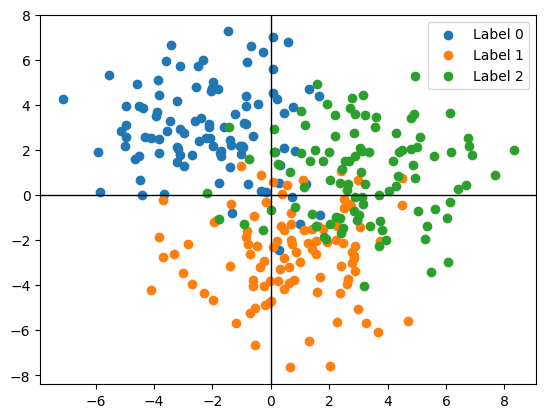

In [11]:
N_points = 100

datas_0 = torch.randn(N_points, 2) * 2 + torch.tensor([-2,3])
datas_1 = torch.randn(N_points, 2) * 2 + torch.tensor([0.5,-3])
datas_2 = torch.randn(N_points, 2) * 2 + torch.tensor([3,1])

datas = torch.stack((datas_0, datas_1, datas_2), dim=1).view(-1, 2)
labels = torch.cat((torch.zeros(N_points), torch.ones(N_points), 2 * torch.ones(N_points))).view(3, -1).T.flatten()

fig, ax = plt.subplots()

for i in range(3):
    ax.scatter(datas[labels == i, 0], datas[labels == i, 1], label=f"Label {i}")

ax.legend()
coordinate_axes(ax)



Epoch 0, loss: 0.7005718946456909
Epoch 100, loss: 0.42982217669487
Epoch 200, loss: 0.4111681282520294
Epoch 300, loss: 0.4061928689479828
Epoch 400, loss: 0.4033663868904114
Epoch 500, loss: 0.401335209608078
Epoch 600, loss: 0.39975252747535706
Epoch 700, loss: 0.39846327900886536
Epoch 800, loss: 0.3973811864852905
Epoch 900, loss: 0.39645373821258545
Optimization finished with loss:  0.39565494656562805 



<Axes: >

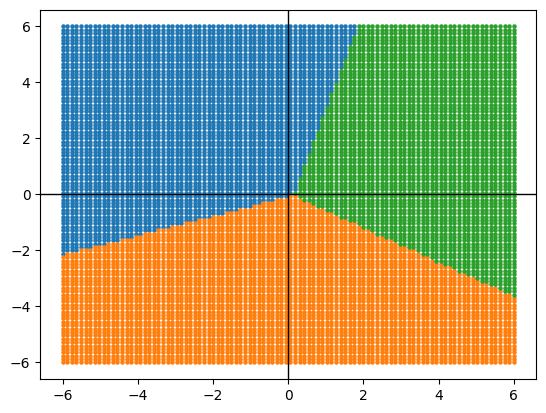

In [12]:
#Train the Model
model = Classification(2, 3)
model.fit(datas, labels, epochs=1000)



#Plot a grid and label it using the trained model
fig, ax = plt.subplots()
grid = torch.stack(torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100)), dim=2).view(-1, 2)

pred = model.predict_label(grid)

for i in range(3):
    ax.scatter(grid[pred == i, 0], grid[pred == i, 1], s=5)

coordinate_axes(ax)


# Non-trivial 2D-classification

In [13]:
def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def label(x1, x2):
    if f(x1, x2) <= 25:
        return 0
    if (f(x1, x2) > 25) and (f(x1, x2) <= 300):
        return 1
    return 2



for i in range(10):
    x1, x2 = torch.randn(2) * 5
    print(f"({x1:.2f}, {x2:.2f}) -> {label(x1, x2)}")


(3.25, 2.16) -> 0
(-1.78, 5.74) -> 2
(4.64, -1.46) -> 1
(0.20, 3.03) -> 1
(2.36, 0.91) -> 1
(2.49, -6.16) -> 2
(5.90, 3.04) -> 2
(3.82, -3.93) -> 1
(-3.80, 2.29) -> 1
(10.65, 2.64) -> 2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='x', ylabel='y'>

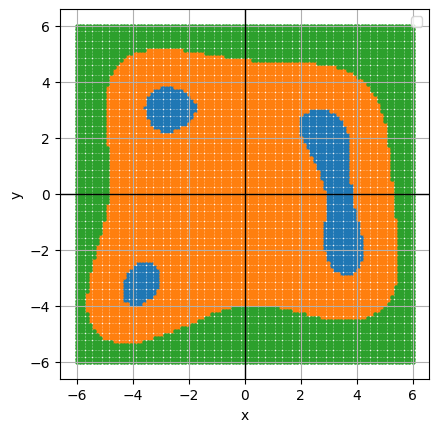

In [14]:
fig, ax = plt.subplots()
grid = torch.stack(torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100)), dim=2).view(-1, 2)

labels = torch.tensor([label(x1, x2) for x1, x2 in grid])

for i in range(3):
    ax.scatter(grid[labels == i, 0], grid[labels == i, 1], s=5)

coordinate_axes(ax)
format_axis(ax, 'x', 'y')

In [15]:
# Divide the grid into 80% training, 10% validation and 10% testing
N_points = grid.shape[0]
N_train = int(0.8 * N_points)

indices = torch.randperm(N_points)

train_indices = indices[:N_train]
val_indices = indices[N_train:int(0.9 * N_points)]
test_indices = indices[int(0.9 * N_points):]

train_data = grid[train_indices]
train_labels = labels[train_indices]
training_dataset = CustomDataset(train_data, train_labels)
training_loader = DataLoader(training_dataset, batch_size=128, shuffle=True)



val_data = grid[val_indices]
val_labels = labels[val_indices]
validation_dataset = CustomDataset(val_data, val_labels)
validation_loader = DataLoader(validation_dataset, batch_size=128, shuffle=False)


test_data = grid[test_indices]
test_labels = labels[test_indices]
test_dataset = CustomDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

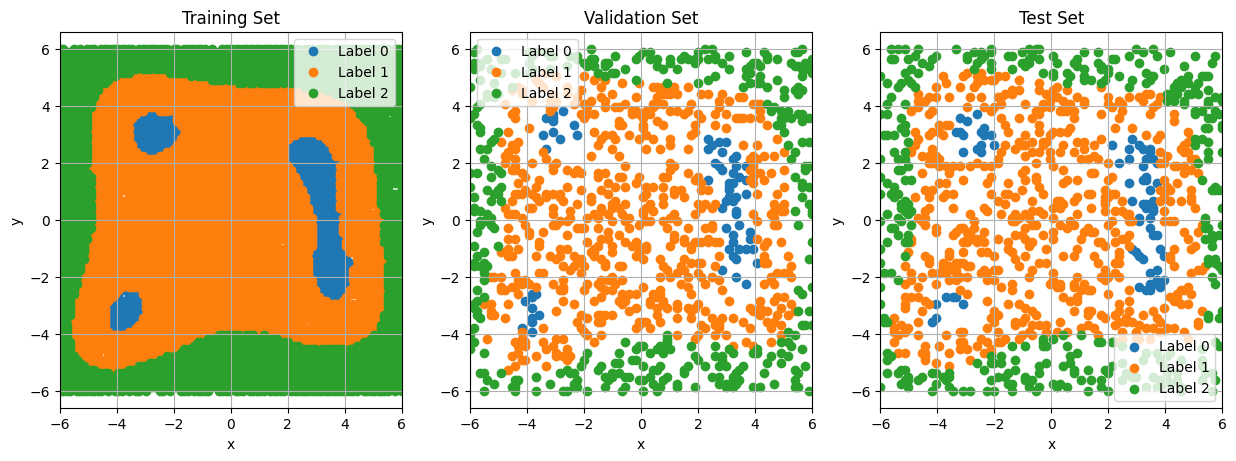

In [16]:

fig, axs = plt.subplots(1,3, figsize=(15,5))

titles = ["Training Set", "Validation Set", "Test Set"]
for loader, ax in zip([training_loader, validation_loader, test_loader], axs):

    for i in range(3):
        ax.scatter(loader.dataset.features[loader.dataset.labels == i, 0], loader.dataset.features[loader.dataset.labels == i, 1], label=f"Label {i}")

    format_axis(ax, title=titles.pop(0))
    ax.set(xlim = (-6, 6))

In [17]:
training_loader.dataset.__getitem__(0)

for batch in training_loader:
    print(batch[0][0], batch[1][0])
    break


tensor([ 3.5758, -1.6364]) tensor(0)


In [18]:
model1 = Classification_I(2,3)
model2 = Classification_II(2,3)
model3 = Classification_III(2,3)

model1.fit_loader(training_loader, validation_loader, epochs=1000, patience=100)
model2.fit_loader(training_loader, validation_loader, epochs=1000, patience=100)
model3.fit_loader(training_loader, validation_loader, epochs=1000, patience=100)



Epoch 0 
 Training loss: 1.4584573602676392 
 Validation loss: 1.2405387706756592
Epoch 250 
 Training loss: 0.8838653831481934 
 Validation loss: 0.8576728105545044
Epoch 500 
 Training loss: 0.883899197101593 
 Validation loss: 0.8575635809898376
Epoch 750 
 Training loss: 0.8839831142425537 
 Validation loss: 0.8577134714126587
Optimization finished with loss:  0.8574860906600952 

Epoch 0 
 Training loss: 1.0352718782424928 
 Validation loss: 0.9608462076187134
Epoch 250 
 Training loss: 0.40321524310112 
 Validation loss: 0.3685692963600159
Epoch 500 
 Training loss: 0.30334857559204104 
 Validation loss: 0.2746219096183777
Epoch 750 
 Training loss: 0.27675372660160064 
 Validation loss: 0.24947788619995118
Optimization finished with loss:  0.23080028796195984 

Epoch 0 
 Training loss: 0.9537302527427673 
 Validation loss: 0.9006027936935425
Epoch 250 
 Training loss: 0.11269816994667053 
 Validation loss: 0.10362535643577575
Epoch 500 
 Training loss: 0.059774723291397096 
 Val

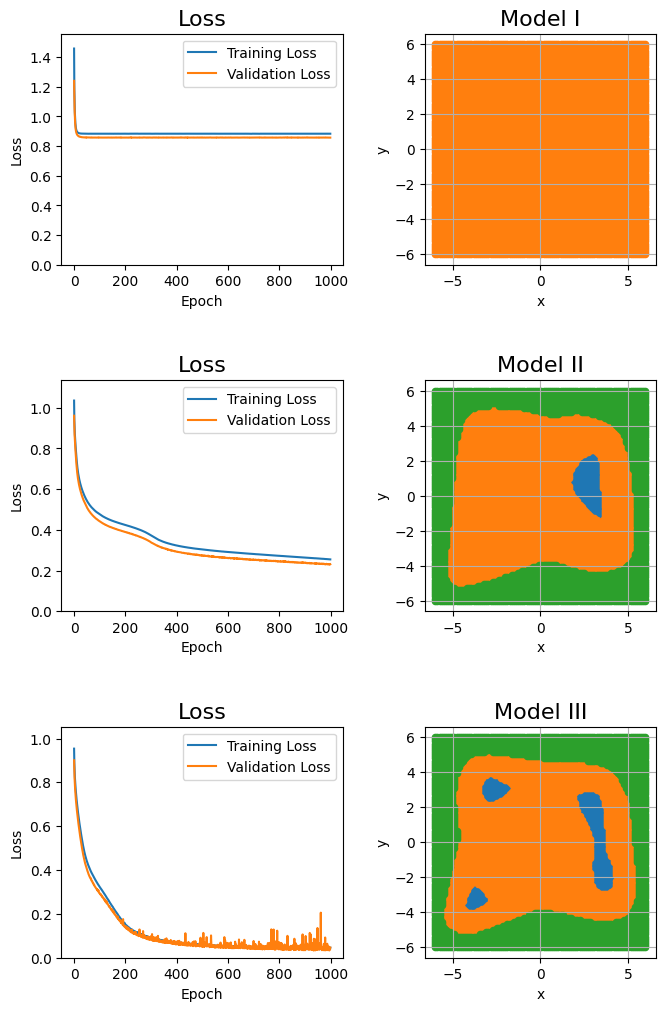

In [19]:
fig, axs = plt.subplots(3,2, figsize=(8, 12), gridspec_kw={'hspace': 0.5})
axs = axs.reshape(-1,2)

models = [model1, model2, model3]

grid = torch.stack(torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100)), dim=2).view(-1, 2)

titles = ["Model I", "Model II", "Model III"]

for ax, model, title in zip(axs, models, titles):
    
    predicted_labels = model.predict_label(grid)
    ax[0].plot(model.train_loss, label="Training Loss")
    ax[0].plot(model.val_loss, label="Validation Loss")
    for i in range(3):
        ax[1].scatter(grid[predicted_labels == i, 0], grid[predicted_labels == i, 1], s=20, label=f"Label {i}")

   
    ax[0].set(ylim = (0,model.train_loss[0] + 0.1), xlabel="Epoch", ylabel="Loss")
    ax[0].legend()

    ax[0].set_title("Loss", fontsize=16)
    ax[1].set_title(title, fontsize=16)
    
    format_axis(ax[1], 'x', 'y', legend=False)


save_plot(fig, "classification_comparison.png", bbox_inches='tight')